In [78]:
from google.colab import files

In [79]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sikandarmustafa","key":"4c501fa137c80d1bd3521f9b9138a214"}'}

In [80]:
!mkdir -p ~/.kaggle

In [81]:
!cp '/content/kaggle.json' ~/.kaggle/

In [82]:
!chmod 600 ~/.kaggle/kaggle.json

In [83]:
!kaggle datasets download -d luluw8071/brain-tumor-mri-datasets

Dataset URL: https://www.kaggle.com/datasets/luluw8071/brain-tumor-mri-datasets
License(s): apache-2.0
brain-tumor-mri-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [84]:
!mkdir -p /content/data

In [85]:
!unzip /content/brain-tumor-mri-datasets.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1385.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1388.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no139.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1390.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1391.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1393.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1394.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1395.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1398.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1399.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no140.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1400.jpg  
  inflating: /content/data/Brain_Tumor_Datasets/train/no/no1401.jpg  
  inflating: /content/data/Brain_Tumor_Da

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [87]:
train_data_dir = './data/Brain_Tumor_Datasets/train/'

In [88]:
test_data_dir = './data/Brain_Tumor_Datasets/test/'

In [89]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,
horizontal_flip=True)

In [90]:
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.9)

In [97]:
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(150, 150),subset='training', color_mode='grayscale')

Found 7012 images belonging to 2 classes.


In [98]:
validation_generator = test_datagen.flow_from_directory(test_data_dir,target_size=(150, 150),subset='validation', color_mode='grayscale')

Found 1576 images belonging to 2 classes.


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [100]:
model = Sequential([
 Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 1)),
 MaxPooling2D(pool_size=(2, 2)),

 Conv2D(32, (3, 3), activation='relu'),
 MaxPooling2D(pool_size=(2, 2)),

 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D(pool_size=(2, 2)),

 Flatten(),
 Dense(64, activation='relu'),
 Dropout(0.5),
 Dense(2, activation='softmax')
])

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
history = model.fit(train_generator,validation_data=validation_generator,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


220/220 ━━━━━━━━━━━━━━━━━━━━ 34s 121ms/step - accuracy: 0.7913 - loss: 0.4357 - val_accuracy: 0.9296 - val_loss: 0.2013
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 35s 104ms/step - accuracy: 0.9329 - loss: 0.1804 - val_accuracy: 0.9651 - val_loss: 0.0950
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.9424 - loss: 0.1537 - val_accuracy: 0.9067 - val_loss: 0.2060
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.9485 - loss: 0.1306 - val_accuracy: 0.9632 - val_loss: 0.0970
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.9566 - loss: 0.1191 - val_accuracy: 0.9651 - val_loss: 0.0904
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9603 - loss: 0.0981 - val_accuracy: 0.9676 - val_loss: 0.0786
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9627 - loss: 0.0994 - val_accuracy: 0.9702 - val_loss: 0.0823
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.9653 - loss: 0.0892 - val

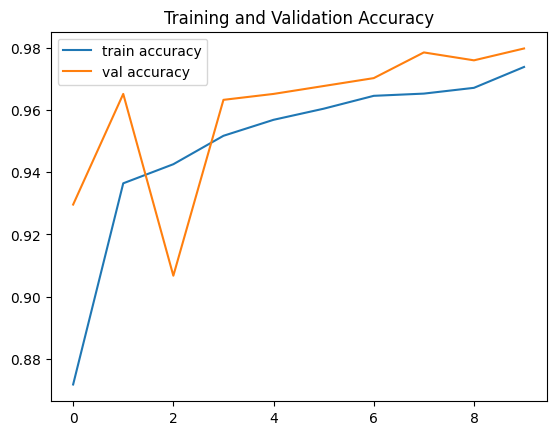

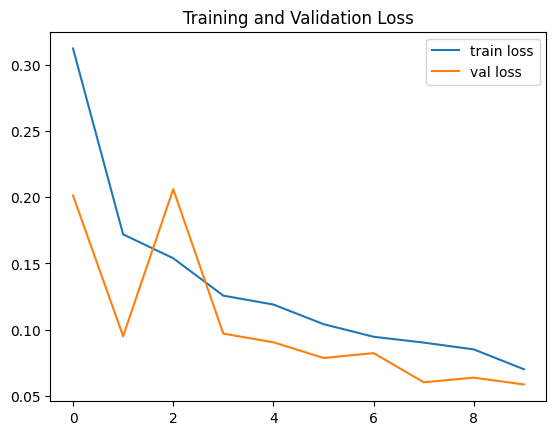

In [103]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [167]:
from tensorflow.keras.preprocessing import image
import numpy as np
np.set_printoptions(suppress=True)

In [168]:
img_path = '/content/data/Brain_Tumor_Datasets/test/yes/Te-gl_0133.jpg'

In [169]:
img = image.load_img(img_path, target_size=(150, 150,1))

In [170]:
img_array = image.img_to_array(img)


In [171]:
from tensorflow.image import rgb_to_grayscale
img_array = rgb_to_grayscale(img_array)

img_array = np.expand_dims(img_array, axis=0)

In [172]:
img_array = img_array.copy()
img_array = img_array / 255.0

In [173]:
pred = model.predict(img_array)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.00001002 0.99999   ]]


In [174]:
pred_index = np.argmax(pred, axis=1)
print(pred_index)

[1]


In [165]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [166]:
if pred_index[0] == 0:
  print("No, you're fine")
else:
  print("I'm Sorry, you got Brain Tumor")

I'm Sorry, you got Brain Tumor
